In [12]:
import pandas as pd
import numpy as np

from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import SSE_functions

from sklearn.cluster import KMeans
import math

In [37]:
store_locations = pd.read_csv("store_locations.csv")

/Users/AlexMac/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:841: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


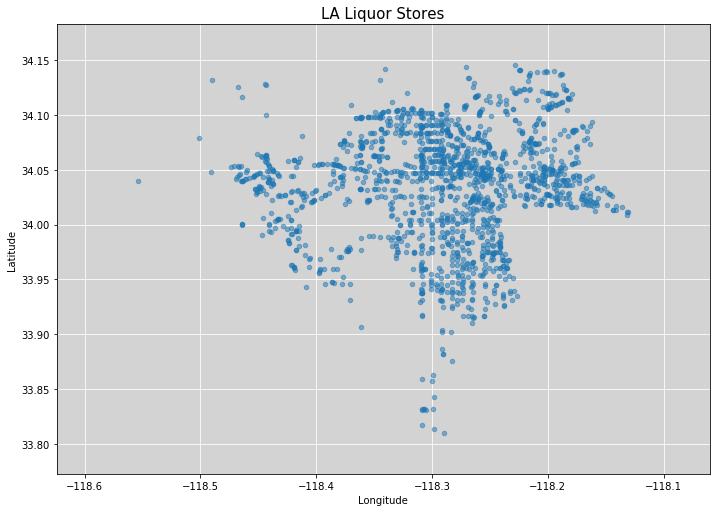

In [38]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
ax.set_axisbelow(True)
ax.grid(b=True, which='major', color = "white")
ax.grid(b=True, which='minor')
ax.set_title("LA Liquor Stores", fontsize= 15)

plot = sns.regplot(x="Longitude", y="Latitude", data=store_locations, scatter_kws={"s": 20, 'alpha':0.5}, fit_reg=False)
plot.set(axis_bgcolor='lightgrey')

plt.savefig("Graphs/LA_Liq_Locs.png")
plt.show()

In [13]:
def SSE_Fit(kmeans, X):
    SSE = []
    i = 0
    c = 0
    summ = 0
    cluster_group = []
    for cc in kmeans.cluster_centers_:
        for label in kmeans.labels_:
            if label == i:
                cluster_group.append(c)
            c = c+1    
        for index in cluster_group:
            summ +=(math.hypot(cc[0] - X[index][0], cc[1] - X[index][1]))**2
        SSE.append(summ)
        i += 1
        c = 0
        summ = 0
        cluster_group = []

    for element in SSE:
        summ += element
    return summ

In [19]:
X = np.array([list(a) for a in zip(store_locations["Longitude"],store_locations["Latitude"] )])


In [20]:
fit= []
i = 0 
for z in range (1, 61):
    print(i)
    kmeans = KMeans(n_clusters= z, random_state=0).fit(X)
    fit.append(SSE_Fit(kmeans, X))
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


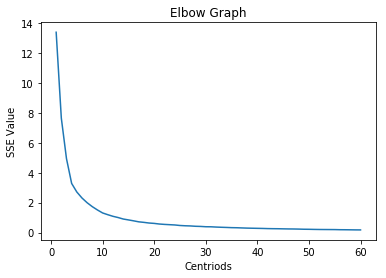

In [22]:
plt.plot(np.arange(1,61), fit)
plt.savefig("Graphs/Elbow.png")
plt.title("Elbow Graph")
plt.xlabel("Centriods")
plt.ylabel("SSE Value")
plt.show()

In [23]:
kmeans = KMeans(n_clusters= 8, random_state=0).fit(X)

In [24]:
cluster_x = []
cluster_y = []

for element in kmeans.cluster_centers_:
    cluster_x.append(element[0])
    cluster_y.append(element[1])

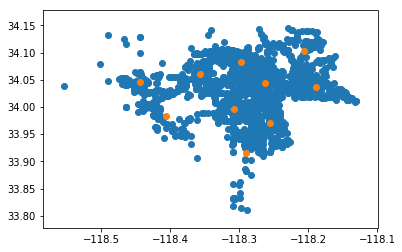

In [24]:
plt.scatter(store_locations["Longitude"],store_locations["Latitude"] )
plt.scatter(cluster_x, cluster_y)
plt.show()

In [25]:
data2 = pd.DataFrame({"x_dim":cluster_x, "y_dim":cluster_y})

/Users/AlexMac/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:841: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


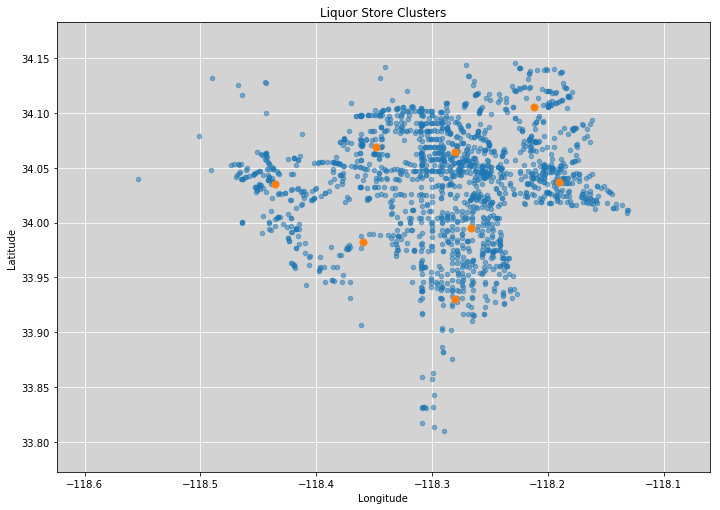

In [30]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
ax.set_axisbelow(True)
ax.grid(b=True, which='major', color = "white")
ax.grid(b=True, which='minor')

plot = sns.regplot(x="Longitude", y="Latitude", data=store_locations, scatter_kws={"s": 20, 'alpha':0.5}, fit_reg=False)
plot = sns.regplot(x="x_dim", y="y_dim", data=data2, scatter_kws={"s": 50, 'alpha':1.0}, fit_reg=False)
plot.set(axis_bgcolor='lightgrey')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Liquor Store Clusters")
plt.savefig("Graphs/Liq_Cluster.png")


plt.show()

In [31]:
crime_location = pd.read_csv("crime_location.csv")

In [32]:
crime_location
X = np.array([list(a) for a in zip(crime_location["Long"],crime_location["Lati"] )])


In [33]:
kmeans = KMeans(n_clusters= 10, random_state=0).fit(X)
cluster_x_crime = []
cluster_y_crime = []

for element in kmeans.cluster_centers_:
    cluster_x_crime.append(element[0])
    cluster_y_crime.append(element[1])

In [34]:
data3 = pd.DataFrame({"x_dim":cluster_x_crime, "y_dim":cluster_y_crime})

/Users/AlexMac/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:841: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


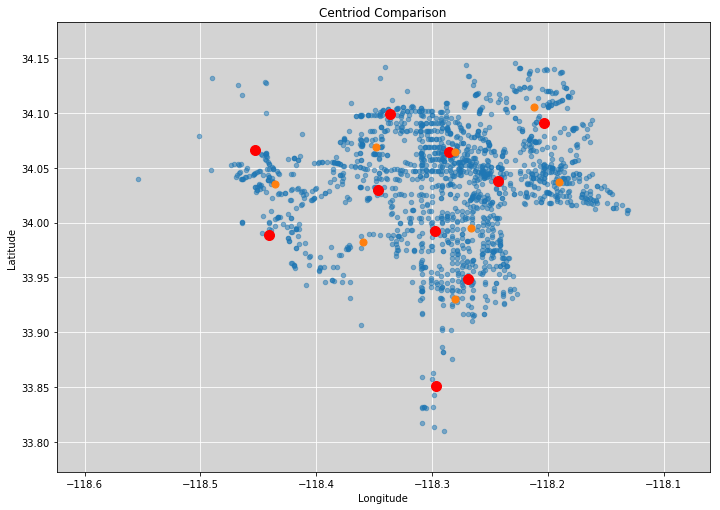

In [42]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
ax.set_axisbelow(True)
ax.grid(b=True, which='major', color = "white")
ax.grid(b=True, which='minor')

plot = sns.regplot(x="Longitude", y="Latitude", data=store_locations, scatter_kws={"s": 20, 'alpha':0.5}, fit_reg=False)
plot = sns.regplot(x="x_dim", y="y_dim", data=data3, color="red", scatter_kws={"s": 100, 'alpha':1.0}, fit_reg=False)
plot = sns.regplot(x="x_dim", y="y_dim", data=data2, scatter_kws={"s": 50, 'alpha':1.0}, fit_reg=False)
plot.set(axis_bgcolor='lightgrey')

plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Centriod Comparison")
plt.savefig("Graphs/Assault_Liq_Cluster.png")

plt.show()